In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re

%matplotlib inline
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

print("Setup Complete")

Setup Complete


In [2]:
occupation_data = pd.read_csv('cosmonauts.csv', parse_dates=True)

occupation_data.head()

,personLabel,birth,death,age,genderLabel
0,Abdul Ahad Mohmand,1959-01-01T00:00:00Z,NaN,NaN,male
1,Abdulmohsen Al-Bassam,1948-12-12T00:00:00Z,NaN,NaN,male
2,Abigail Harrison,1997-06-11T00:00:00Z,NaN,NaN,female
3,Akihiko Hoshide,1968-12-28T00:00:00Z,NaN,NaN,male
4,Alan Bean,1932-03-15T00:00:00Z,2018-05-26T00:00:00Z,86.0,male


In [165]:
occupation_data.shape

(749, 5)

In [166]:
len(occupation_data['personLabel'].unique())

741

In [145]:
occupation_data[occupation_data['personLabel'].duplicated() == True]

,personLabel,birth,death,age,genderLabel
291,Jiří Alter,1891-01-01T00:00:00Z,1972-10-30T00:00:00Z,81.0,male
292,Jiří Alter,1891-03-13T00:00:00Z,1972-01-01T00:00:00Z,81.0,male
293,Jiří Alter,1891-03-13T00:00:00Z,1972-10-30T00:00:00Z,81.0,male
485,Paul J. Weitz,1932-07-25T00:00:00Z,2017-10-23T00:00:00Z,85.0,male
491,Pavel Popovich,1930-10-05T00:00:00Z,2009-09-30T00:00:00Z,79.0,male
590,Sergei Anokhin,1910-04-01T00:00:00Z,1986-04-15T00:00:00Z,76.0,male
632,Sultan bin Salman Al Saud,1956-06-27T00:00:00Z,NaN,NaN,male
730,Yuri Baturin,1949-06-12T00:00:00Z,NaN,NaN,male


In [3]:
occupation_data = occupation_data.drop([290, 291, 292, 589, 631, 729, 490, 484])

occupation_data[occupation_data['personLabel'] == 'Jiří Alter']

,personLabel,birth,death,age,genderLabel
293,Jiří Alter,1891-03-13T00:00:00Z,1972-10-30T00:00:00Z,81.0,male


In [4]:
occupation_data.reset_index(drop=True, inplace=True)
occupation_data.head()

,personLabel,birth,death,age,genderLabel
0,Abdul Ahad Mohmand,1959-01-01T00:00:00Z,NaN,NaN,male
1,Abdulmohsen Al-Bassam,1948-12-12T00:00:00Z,NaN,NaN,male
2,Abigail Harrison,1997-06-11T00:00:00Z,NaN,NaN,female
3,Akihiko Hoshide,1968-12-28T00:00:00Z,NaN,NaN,male
4,Alan Bean,1932-03-15T00:00:00Z,2018-05-26T00:00:00Z,86.0,male


In [5]:
for i in range(occupation_data.shape[0]):
    try:
        matches = re.match(r"(\d{4})-(\d{2})-(\d{2})", occupation_data.loc[i,'birth'])
        occupation_data.loc[i,'Day']=int(matches[3])
        occupation_data.loc[i,'Month']=int(matches[2])
        occupation_data.loc[i,'Year']=int(matches[1])
    except:
        pass
    
occupation_data[['Day', 'Month', 'Year']] = occupation_data[['Day', 'Month', 'Year']].astype('int32')
occupation_data.head()

,personLabel,birth,death,age,genderLabel,Day,Month,Year
0,Abdul Ahad Mohmand,1959-01-01T00:00:00Z,NaN,NaN,male,1,1,1959
1,Abdulmohsen Al-Bassam,1948-12-12T00:00:00Z,NaN,NaN,male,12,12,1948
2,Abigail Harrison,1997-06-11T00:00:00Z,NaN,NaN,female,11,6,1997
3,Akihiko Hoshide,1968-12-28T00:00:00Z,NaN,NaN,male,28,12,1968
4,Alan Bean,1932-03-15T00:00:00Z,2018-05-26T00:00:00Z,86.0,male,15,3,1932


In [6]:
occupation_data[occupation_data['Day'].isnull().values == True]

,personLabel,birth,death,age,genderLabel,Day,Month,Year


♈	Aries - March 21 – April 20
♉	Taurus - April 21 – May 21
♊	Gemini - May 22 – June 21
♋	Cancer - June 22 – July 22
♌	Leo - July 23 – August 22
♍	Virgo - August 23 – September 23
♎	Libra - September 24 – October 23
♏	Scorpio - October 24 – November 22
♐	Sagittarius - November 23 – December 21
♑   Capricorn - December 22 – January 20
♒   Aquarius - January 21 – February 19
♓	Pisces - February 20 – March 20

In [14]:
for i in range(occupation_data.shape[0]):
    if occupation_data.loc[i,'Month']==1:
        if occupation_data.loc[i,'Day']>=21:
            occupation_data.loc[i,'SignLabel']='Aquarius'
            occupation_data.loc[i,'SignN']=11
        else:
            occupation_data.loc[i,'SignLabel']='Capricorn'
            occupation_data.loc[i,'SignN']=10

    elif occupation_data.loc[i,'Month']==2:
        if occupation_data.loc[i,'Day']>=20:
            occupation_data.loc[i,'SignLabel']='Pisces'
            occupation_data.loc[i,'SignN']=12
        else:
            occupation_data.loc[i,'SignLabel']='Aquarius'
            occupation_data.loc[i,'SignN']=11

    elif occupation_data.loc[i,'Month']==3:
        if occupation_data.loc[i,'Day']>=21:
            occupation_data.loc[i,'SignLabel']='Aries'
            occupation_data.loc[i,'SignN']=1
        else:
            occupation_data.loc[i,'SignLabel']='Pisces'
            occupation_data.loc[i,'SignN']=12

    elif occupation_data.loc[i,'Month']==4:
        if occupation_data.loc[i,'Day']>=21:
            occupation_data.loc[i,'SignLabel']='Taurus'
            occupation_data.loc[i,'SignN']=2
        else:
            occupation_data.loc[i,'SignLabel']='Aries'
            occupation_data.loc[i,'SignN']=1

    elif occupation_data.loc[i,'Month']==5:
        if occupation_data.loc[i,'Day']>=22:
            occupation_data.loc[i,'SignLabel']='Gemini'
            occupation_data.loc[i,'SignN']=3
        else:
            occupation_data.loc[i,'SignLabel']='Taurus'
            occupation_data.loc[i,'SignN']=2
            
    elif occupation_data.loc[i,'Month']==6:
        if occupation_data.loc[i,'Day']>=22:
            occupation_data.loc[i,'SignLabel']='Cancer'
            occupation_data.loc[i,'SignN']=4
        else:
            occupation_data.loc[i,'SignLabel']='Gemini'
            occupation_data.loc[i,'SignN']=3
            
    elif occupation_data.loc[i,'Month']==7:
        if occupation_data.loc[i,'Day']>=23:
            occupation_data.loc[i,'SignLabel']='Leo'
            occupation_data.loc[i,'SignN']=5
        else:
            occupation_data.loc[i,'SignLabel']='Cancer'
            occupation_data.loc[i,'SignN']=4
            
    elif occupation_data.loc[i,'Month']==8:
        if occupation_data.loc[i,'Day']>=23:
            occupation_data.loc[i,'SignLabel']='Virgo'
            occupation_data.loc[i,'SignN']=6
        else:
            occupation_data.loc[i,'SignLabel']='Leo'
            occupation_data.loc[i,'SignN']=5
            
    elif occupation_data.loc[i,'Month']==9:
        if occupation_data.loc[i,'Day']>=24:
            occupation_data.loc[i,'SignLabel']='Libra'
            occupation_data.loc[i,'SignN']=5
        else:
            occupation_data.loc[i,'SignLabel']='Virgo'
            occupation_data.loc[i,'SignN']=6
            
    elif occupation_data.loc[i,'Month']==10:
        if occupation_data.loc[i,'Day']>=24:
            occupation_data.loc[i,'SignLabel']='Scorpio'
            occupation_data.loc[i,'SignN']=8
        else:
            occupation_data.loc[i,'SignLabel']='Libra'
            occupation_data.loc[i,'SignN']=7
            
    elif occupation_data.loc[i,'Month']==11:
        if occupation_data.loc[i,'Day']>=23:
            occupation_data.loc[i,'SignLabel']='Sagittarius'
            occupation_data.loc[i,'SignN']=9
        else:
            occupation_data.loc[i,'SignLabel']='Scorpio'
            occupation_data.loc[i,'SignN']=8
            
    elif occupation_data.loc[i,'Month']==12:
        if occupation_data.loc[i,'Day']>=21:
            occupation_data.loc[i,'SignLabel']='Capricorn'
            occupation_data.loc[i,'SignN']=10
        else:
            occupation_data.loc[i,'SignLabel']='Sagittarius'
            occupation_data.loc[i,'SignN']=9

In [15]:
occupation_data["SignN"] = occupation_data['SignN'].astype('int32')
occupation_data.head()

,personLabel,birth,death,age,genderLabel,Day,Month,Year,SignLabel,SignN
0,Abdul Ahad Mohmand,1959-01-01T00:00:00Z,NaN,NaN,male,1,1,1959,Capricorn,10
1,Abdulmohsen Al-Bassam,1948-12-12T00:00:00Z,NaN,NaN,male,12,12,1948,Sagittarius,9
2,Abigail Harrison,1997-06-11T00:00:00Z,NaN,NaN,female,11,6,1997,Gemini,3
3,Akihiko Hoshide,1968-12-28T00:00:00Z,NaN,NaN,male,28,12,1968,Capricorn,10
4,Alan Bean,1932-03-15T00:00:00Z,2018-05-26T00:00:00Z,86.0,male,15,3,1932,Pisces,12


In [8]:
gender_data=occupation_data.groupby('genderLabel').count().reset_index()
gender_data

,genderLabel,personLabel,birth,death,age,Day,Month,Year
0,female,91,91,9,9,91,91,91
1,male,649,649,157,157,649,649,649
2,transgender female,1,1,0,0,1,1,1


In [191]:
total=gender_data['personLabel'].sum()
male=gender_data.loc[1,'personLabel']
female=gender_data.loc[0,'personLabel']
other=gender_data.loc[2,'personLabel']

print(f"""male astronauts are {male} or {(male/total)*100:.2f}% from the total {total}
female astronauts are {female} or {(female/total)*100:.2f}% from the total {total}
other astronauts are {other} or {(other/total)*100:.2f}% from the total {total}""")

male astronauts are 649 or 87.58% from the total 741
female astronauts are 91 or 12.28% from the total 741
other astronauts are 1 or 0.13% from the total 741


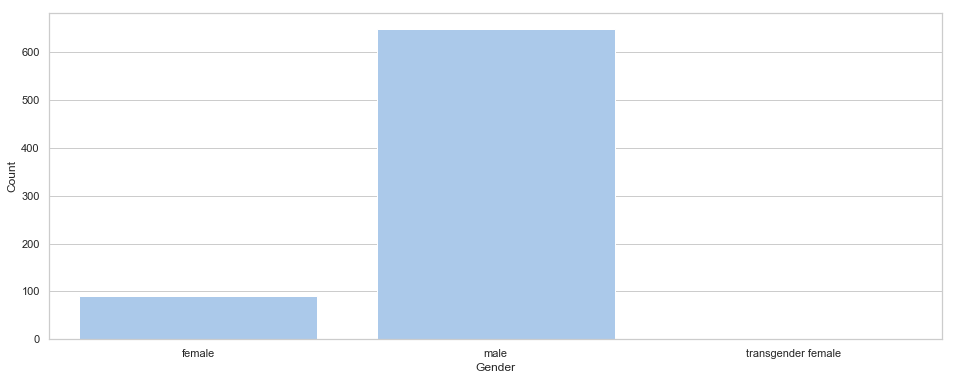

In [11]:
f, ax = plt.subplots(figsize=(16, 6))

ax = sns.barplot(x='genderLabel', y='personLabel', data=gender_data, color="b", ci=None)

# ax.set_title('Gender of the astronauts')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')

plt.savefig('gender.png', dpi = 72, transparent = True, bbox_inches='tight', pad_inches=0.5)

In [16]:
sign_data=occupation_data.groupby('SignLabel', sort=False)['SignN'].count().reset_index()

sign_data.loc[sign_data['SignLabel'] == 'Aries','Sign']=1
sign_data.loc[sign_data['SignLabel'] == 'Taurus','Sign']=2
sign_data.loc[sign_data['SignLabel'] == 'Gemini','Sign']=3
sign_data.loc[sign_data['SignLabel'] == 'Cancer','Sign']=4
sign_data.loc[sign_data['SignLabel'] == 'Leo','Sign']=5
sign_data.loc[sign_data['SignLabel'] == 'Virgo','Sign']=6
sign_data.loc[sign_data['SignLabel'] == 'Libra','Sign']=7
sign_data.loc[sign_data['SignLabel'] == 'Scorpio','Sign']=8
sign_data.loc[sign_data['SignLabel'] == 'Sagittarius','Sign']=9
sign_data.loc[sign_data['SignLabel'] == 'Capricorn','Sign']=10
sign_data.loc[sign_data['SignLabel'] == 'Aquarius','Sign']=11
sign_data.loc[sign_data['SignLabel'] == 'Pisces','Sign']=12

sign_data.sort_values("Sign", axis = 0, ascending = True, inplace = True, na_position = 'last')
sign_data

,SignLabel,SignN,Sign
9,Aries,54,1.0
5,Taurus,73,2.0
2,Gemini,56,3.0
10,Cancer,53,4.0
7,Leo,67,5.0
11,Virgo,85,6.0
6,Libra,61,7.0
4,Scorpio,66,8.0
1,Sagittarius,39,9.0
0,Capricorn,68,10.0


In [298]:
print(sign_data['SignN'].describe())

count    12.000000
mean     61.750000
std      11.917329
min      39.000000
25%      53.750000
50%      63.500000
75%      67.250000
max      85.000000
Name: SignN, dtype: float64


In [243]:
from scipy.stats import shapiro

stat, p = shapiro(sign_data['SignN'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.969, p=0.905
Probably Gaussian


C:\Users\nikola\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


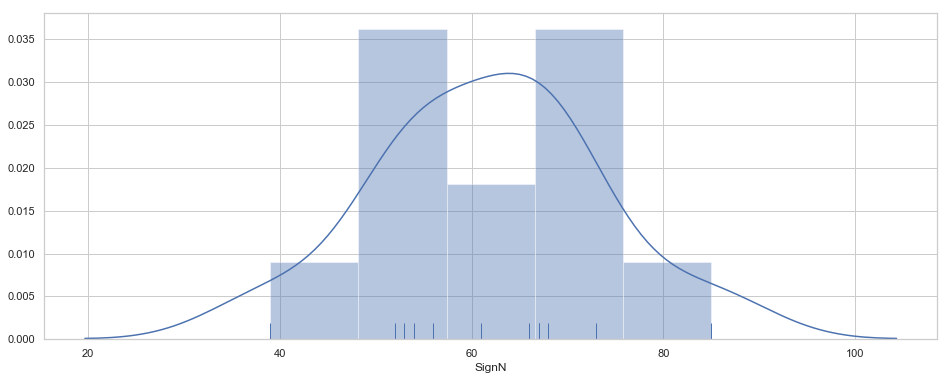

In [18]:
f, ax = plt.subplots(figsize=(16, 6))

sns.distplot(sign_data['SignN'], bins=5, kde=True, rug=True)

plt.savefig('sign_his.png', dpi = 72, transparent = True, bbox_inches='tight', pad_inches=0.5)

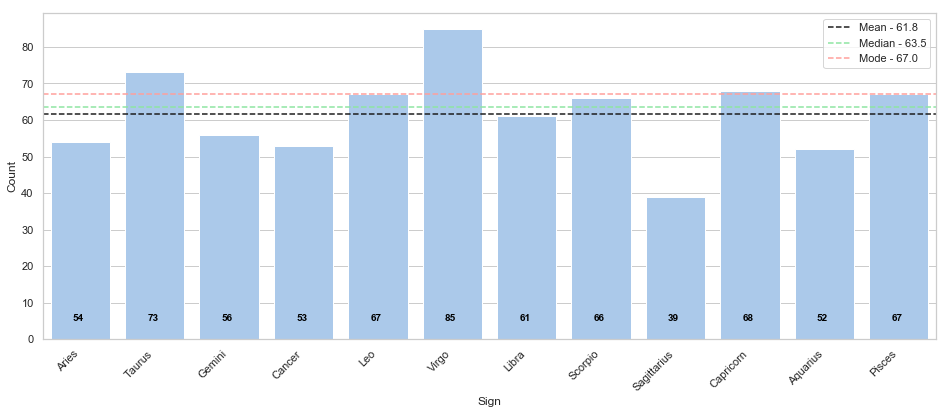

In [22]:
f, ax = plt.subplots(figsize=(16, 6))

ax = sns.barplot(x='SignLabel', y='SignN', data=sign_data, color="b", ci=None)
ax.set_xticklabels(sign_data['SignLabel'], rotation = 45, ha="right")

mean=sign_data['SignN'].mean()
ax.axhline(mean, color='k', linestyle='--')

median=sign_data['SignN'].median()
ax.axhline(median, color='g', linestyle='--')

mode=sign_data['SignN'].mode()[0]
ax.axhline(mode, color='r', linestyle='--')

plt.legend({f'Mean - {mean:.1f}':mean,
            f'Median - {median:.1f}':median,
            f'Mode - {mode:.1f}':mode})

ax.set_xlabel('Sign')
ax.set_ylabel('Count')

for i,v in enumerate(round(sign_data['SignN'],2)):
    plt.text(i-.1, 5, str(v), color='black', fontweight='bold')
    
plt.savefig('sign.png', dpi = 72, transparent = True, bbox_inches='tight', pad_inches=0.5)

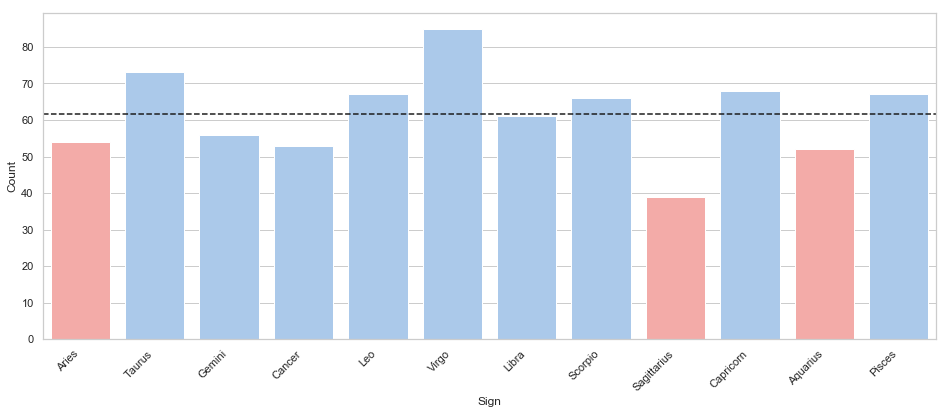

In [23]:
# The Most Adventurous Zodiac Signs

# Sagittarius - 7
# Aquarius - 6
# Aries - 5
# Gemini - 4
# Libra - 3
# Scorpio - 3
clrs=['r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'b', 'r', 'b']
f, ax = plt.subplots(figsize=(16, 6))

ax = sns.barplot(x='SignLabel', y='SignN', data=sign_data, color="b", ci=None, palette=clrs)
ax.set_xticklabels(sign_data['SignLabel'], rotation = 45, ha="right")

mean=sign_data['SignN'].mean()
ax.axhline(mean, color='k', linestyle='--')

ax.set_xlabel('Sign')
ax.set_ylabel('Count')

plt.savefig('sign_adventur.png', dpi = 72, transparent = True, bbox_inches='tight', pad_inches=0.5)

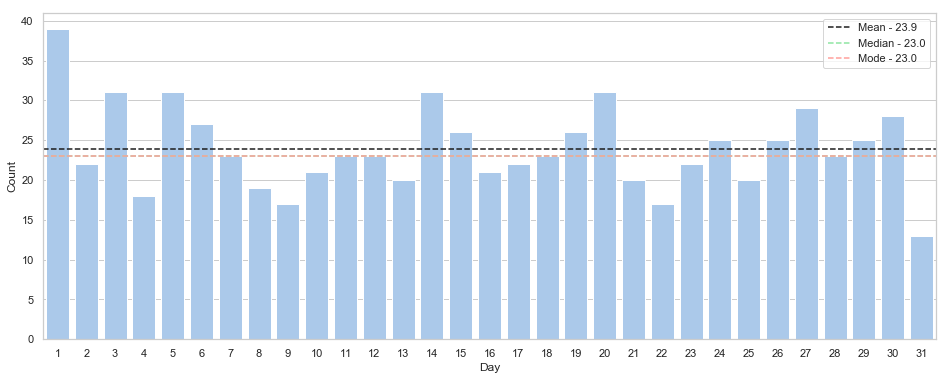

In [26]:
d_data=occupation_data.groupby('Day', sort=False).count().reset_index()

f, ax = plt.subplots(figsize=(16, 6))

mean=d_data['personLabel'].mean()
ax.axhline(mean, color='k', linestyle='--')

median=d_data['personLabel'].median()
ax.axhline(median, color='g', linestyle='--')

mode=d_data['personLabel'].mode()[0]
ax.axhline(mode, color='r', linestyle='--')

plt.legend({f'Mean - {mean:.1f}':mean,
            f'Median - {median:.1f}':median,
            f'Mode - {mode:.1f}':mode})

ax = sns.barplot(x='Day', y='personLabel', data=d_data, color="b", ci=None)

ax.set_xlabel('Day')
ax.set_ylabel('Count')

plt.savefig('sign_day.png', dpi = 72, transparent = True, bbox_inches='tight', pad_inches=0.5)

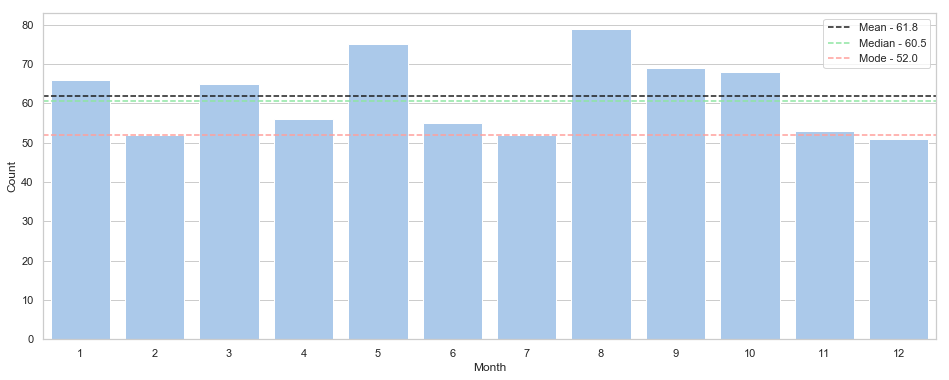

In [25]:
m_data=occupation_data.groupby('Month', sort=False).count().reset_index()

f, ax = plt.subplots(figsize=(16, 6))

mean=m_data['personLabel'].mean()
ax.axhline(mean, color='k', linestyle='--')

median=m_data['personLabel'].median()
ax.axhline(median, color='g', linestyle='--')

mode=m_data['personLabel'].mode()[0]
ax.axhline(mode, color='r', linestyle='--')

plt.legend({f'Mean - {mean:.1f}':mean,
            f'Median - {median:.1f}':median,
            f'Mode - {mode:.1f}':mode})

ax = sns.barplot(x='Month', y='personLabel', data=m_data, color="b", ci=None)

ax.set_xlabel('Month')
ax.set_ylabel('Count')

plt.savefig('sign_month.png', dpi = 72, transparent = True, bbox_inches='tight', pad_inches=0.5)